# Python Lesson 5 — Files, Random Numbers, Plotting, and SciPy

# Exercise 5.1

In [3]:
import numpy as np

out_file = "outputs/test_write.txt"

# Write
with open(out_file, "w") as fh:
    for i in range(10):
        fh.write(f"The square root of {i} is {np.sqrt(i):.5f}\n")

print("Wrote:", out_file)

# Read back (quick check)
with open(out_file, "r") as fh:
    lines = fh.readlines()

print("First 3 lines:")
print("".join(lines[:3]))


Wrote: outputs/test_write.txt
First 3 lines:
The square root of 0 is 0.00000
The square root of 1 is 1.00000
The square root of 2 is 1.41421



## Exercise 5.2 — Random number generation

In [4]:
rng = np.random.default_rng()

normal_arr = rng.standard_normal((5,5))     # mean=0, std=1
uniform_arr = rng.random((5,5))              # uniform [0,1)
integers_arr = rng.integers(0, 10, (5,5))    # integers 0–9

print("Normal:\n", normal_arr)
print("\nUniform:\n", uniform_arr)
print("\nIntegers:\n", integers_arr)


Normal:
 [[ 1.82104309 -0.1637013  -0.59993515 -1.268326   -0.59724407]
 [-2.04978083 -0.44765993  1.09502044  1.03863785 -0.06862585]
 [ 0.98570765  0.23416125  2.14247194 -0.24668373  0.08035751]
 [-0.16820189 -0.74256471  0.83239901  0.00593637  0.41741272]
 [-0.30334223 -0.02671065 -0.9634814  -1.09925465  0.93291296]]

Uniform:
 [[0.8705379  0.4814669  0.53542871 0.91548965 0.58226572]
 [0.15901924 0.60354313 0.12020068 0.14462132 0.65714731]
 [0.65652032 0.68027057 0.49152659 0.39387409 0.87248387]
 [0.90195577 0.72687668 0.71645125 0.93918917 0.33701116]
 [0.61694659 0.58055529 0.30355616 0.80395532 0.80673226]]

Integers:
 [[4 5 9 1 3]
 [0 9 5 9 8]
 [7 4 0 5 1]
 [5 3 2 4 5]
 [8 0 2 6 8]]


In [5]:
rng1 = np.random.default_rng(12345)
rng2 = np.random.default_rng(12345)

print(rng1.standard_normal(5))
print(rng2.standard_normal(5))


[-1.42382504  1.26372846 -0.87066174 -0.25917323 -0.07534331]
[-1.42382504  1.26372846 -0.87066174 -0.25917323 -0.07534331]


In [6]:
from random import normalvariate

N = 200_000

# Python loop (slow)
%timeit [normalvariate(0,1) for _ in range(N)]

# NumPy vectorized (fast)
%timeit rng.standard_normal(N)


70.9 ms ± 7.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.12 ms ± 65.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exercise 5.3

In [7]:
import numpy as np

rng = np.random.default_rng(12345)

arr = rng.standard_normal((6, 6))
print("arr:\n", arr)

# Boolean mask: True where condition holds
mask_pos = arr > 0
print("\nmask_pos (arr > 0):\n", mask_pos)

# Example 1: convert to +1 / -1 depending on sign
signs = np.where(arr > 0, 1, -1)
print("\nsigns (+1 if >0 else -1):\n", signs)

# Example 2: keep positives, replace negatives with -1
arr_replace = np.where(arr > 0, arr, -1)
print("\narr_replace (keep positives, negatives -> -1):\n", arr_replace)


arr:
 [[-1.42382504  1.26372846 -0.87066174 -0.25917323 -0.07534331 -0.74088465]
 [-1.3677927   0.6488928   0.36105811 -1.95286306  2.34740965  0.96849691]
 [-0.75938718  0.90219827 -0.46695317 -0.06068952  0.78884434 -1.25666813]
 [ 0.57585751  1.39897899  1.32229806 -0.29969852  0.90291934 -1.62158273]
 [-0.15818926  0.44948393 -1.34360107 -0.08168759  1.72473993  2.61815943]
 [ 0.77736134  0.8286332  -0.95898831 -1.20938829 -1.41229201  0.54154683]]

mask_pos (arr > 0):
 [[False  True False False False False]
 [False  True  True False  True  True]
 [False  True False False  True False]
 [ True  True  True False  True False]
 [False  True False False  True  True]
 [ True  True False False False  True]]

signs (+1 if >0 else -1):
 [[-1  1 -1 -1 -1 -1]
 [-1  1  1 -1  1  1]
 [-1  1 -1 -1  1 -1]
 [ 1  1  1 -1  1 -1]
 [-1  1 -1 -1  1  1]
 [ 1  1 -1 -1 -1  1]]

arr_replace (keep positives, negatives -> -1):
 [[-1.          1.26372846 -1.         -1.         -1.         -1.        ]
 [-1.  

In [8]:
A = rng.standard_normal((4, 4))
B = rng.standard_normal((4, 4))
C = rng.standard_normal((4, 4))

chosen = np.where(C > 0, A, B)  # if C>0 take A else take B

print("A:\n", A)
print("\nB:\n", B)
print("\n(C>0):\n", C > 0)
print("\nchosen:\n", chosen)


A:
 [[ 0.7519394  -0.65876032 -1.22867499  0.25755777]
 [ 0.31290292 -0.13081169  1.26998312 -0.09296246]
 [-0.06615089 -1.10821447  0.13595685  1.34707776]
 [ 0.06114402  0.0709146   0.43365454  0.27748366]]

B:
 [[ 0.53025239  0.53672097  0.61835001 -0.79501746]
 [ 0.30003095 -1.60270159  0.26679883 -1.26162378]
 [-0.07127081  0.47404973 -0.41485376  0.0977165 ]
 [-1.64041784 -0.85725882  0.68828179 -1.15452958]]

(C>0):
 [[ True False False False]
 [ True  True False False]
 [ True False False  True]
 [False False False  True]]

chosen:
 [[ 0.7519394   0.53672097  0.61835001 -0.79501746]
 [ 0.31290292 -0.13081169  0.26679883 -1.26162378]
 [-0.06615089  0.47404973 -0.41485376  1.34707776]
 [-1.64041784 -0.85725882  0.68828179  0.27748366]]


In [9]:
dimension = 20
GOE = rng.standard_normal((dimension, dimension))
GOE = (GOE + GOE.T) / 2  # symmetrize

print("GOE mean:", GOE.mean())
print("GOE std :", GOE.std())

diag = np.diag(GOE)
print("\nDiagonal mean:", diag.mean())
print("Diagonal std :", diag.std())

# Row/column stats
print("\nMean by column (axis=0) shape:", GOE.mean(axis=0).shape)
print("Mean by row    (axis=1) shape:", GOE.mean(axis=1).shape)

# min/max + argmin/argmax (flattened index)
min_val = GOE.min()
max_val = GOE.max()
argmin_flat = GOE.argmin()
argmax_flat = GOE.argmax()

print("\nMin:", min_val, " argmin(flat):", argmin_flat)
print("Max:", max_val, " argmax(flat):", argmax_flat)

# Convert flat index -> (row, col)
min_rc = np.unravel_index(argmin_flat, GOE.shape)
max_rc = np.unravel_index(argmax_flat, GOE.shape)

print("Min location (row,col):", min_rc)
print("Max location (row,col):", max_rc)

# cumsum and cumprod (flattened behavior)
print("\nGOE cumsum first 5:", GOE.cumsum()[:5])


GOE mean: -0.010491188014017796
GOE std : 0.7623032225349993

Diagonal mean: -0.15460952727190663
Diagonal std : 0.8944221168930457

Mean by column (axis=0) shape: (20,)
Mean by row    (axis=1) shape: (20,)

Min: -1.9246342596583617  argmin(flat): 131
Max: 2.0725253544548954  argmax(flat): 255
Min location (row,col): (np.int64(6), np.int64(11))
Max location (row,col): (np.int64(12), np.int64(15))

GOE cumsum first 5: [-0.5710329  -0.70822592 -1.21351896  0.06044906  0.42208866]


## Exercise 5.4

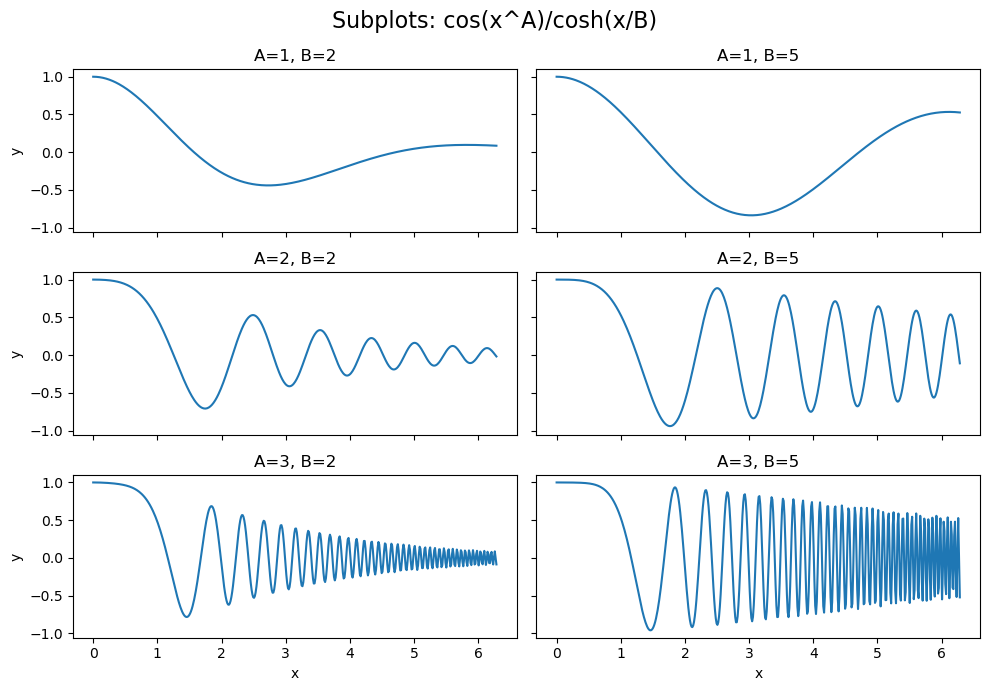

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 500)

A_vals = [1, 2, 3]
B_vals = [2, 5]

fig, ax = plt.subplots(len(A_vals), len(B_vals), figsize=(10, 7), sharex=True, sharey=True)
fig.suptitle("Subplots: cos(x^A)/cosh(x/B)", fontsize=16)

for i, A in enumerate(A_vals):
    for j, B in enumerate(B_vals):
        y = np.cos(x**A) / np.cosh(x / B)
        ax[i, j].plot(x, y)
        ax[i, j].set_title(f"A={A}, B={B}", fontsize=12)
        if i == len(A_vals) - 1:
            ax[i, j].set_xlabel("x")
        if j == 0:
            ax[i, j].set_ylabel("y")

fig.tight_layout()
plt.show()


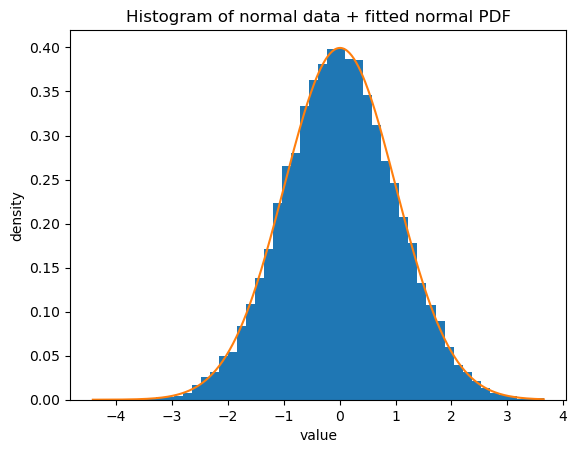

In [11]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)
data = rng.normal(loc=0, scale=1, size=20000)

fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, bins=50, density=True)  # density=True -> normalized

# Overlay a normal pdf with same mean/std
mu = data.mean()
sigma = data.std()

x = np.linspace(bins[0], bins[-1], 400)
pdf = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu)/sigma)**2)

ax.plot(x, pdf)
ax.set_title("Histogram of normal data + fitted normal PDF")
ax.set_xlabel("value")
ax.set_ylabel("density")
plt.show()


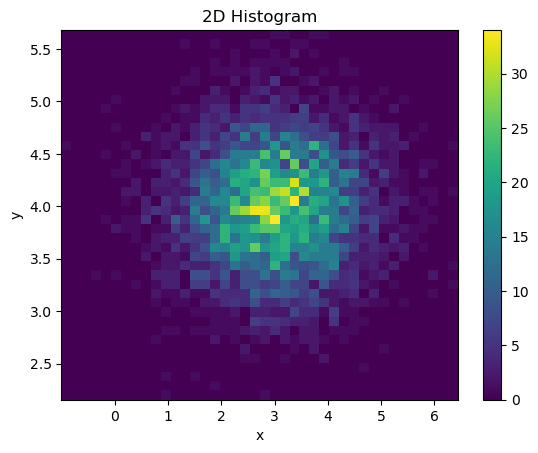

In [12]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(321)
x = rng.normal(3, 1, 5000)
y = rng.normal(4, 0.5, 5000)

fig, ax = plt.subplots()
h = ax.hist2d(x, y, bins=40)
plt.colorbar(h[3], ax=ax)
ax.set_title("2D Histogram")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


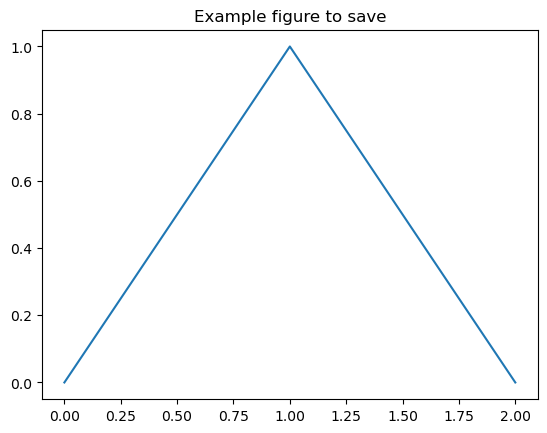

Saved: figure_example.png and figure_example.pdf


In [13]:
import matplotlib.pyplot as plt

# assumes you have an active figure, or make one quickly:
fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 1, 0])
ax.set_title("Example figure to save")

plt.savefig("figure_example.png", dpi=150, bbox_inches="tight")
plt.savefig("figure_example.pdf", bbox_inches="tight")
plt.show()

print("Saved: figure_example.png and figure_example.pdf")


## Exercise 5.5

slope (b): -1.2622063179869414
intercept log10(a): 0.7402059498806604
a fitted: 5.498015373516186


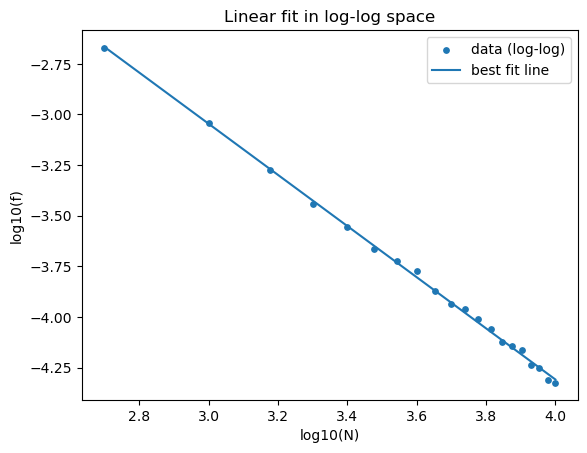

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng(7)

# True model: f(N) = a * N^b
a_true = 5.05
b_true = -1.25

N = np.arange(500, 10500, 500)
f_true = a_true * N**b_true

# Add noise (relative noise)
noise = rng.normal(0, 0.05, size=f_true.shape)
f_noisy = f_true * (1 + noise)

# log-log transform
x = np.log10(N)
y = np.log10(f_noisy)

result = stats.linregress(x, y)

print("slope (b):", result.slope)
print("intercept log10(a):", result.intercept)
print("a fitted:", 10**result.intercept)

fig, ax = plt.subplots()
ax.scatter(x, y, s=15, label="data (log-log)")
ax.plot(x, result.slope*x + result.intercept, label="best fit line")
ax.set_xlabel("log10(N)")
ax.set_ylabel("log10(f)")
ax.set_title("Linear fit in log-log space")
ax.legend()
plt.show()


params: [ 1.11692398  1.24155136 -2.61984795  1.95320213]
errors: [0.03312649 0.00382403 0.04940016 0.0254207 ]


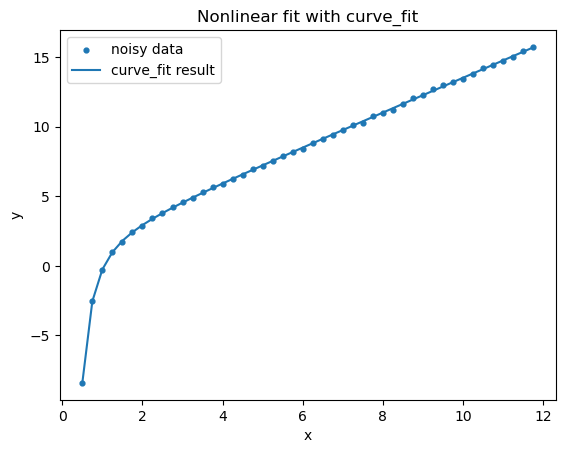

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

rng = np.random.default_rng(8)

# True model: g(x) = a + b*x + c/x^d
a_true, b_true, c_true, d_true = 1.05, 1.25, -2.5, 2.0
x = np.arange(0.5, 12, 0.25)

def model(x, a, b, c, d):
    return a + b*x + c/(x**d)

y_true = model(x, a_true, b_true, c_true, d_true)
y_noisy = y_true + rng.normal(0, 0.05, size=y_true.shape)

# initial guesses (p0) help convergence
p0 = (0.5, 0.7, -0.9, 3.0)
params, pcov = optimize.curve_fit(model, x, y_noisy, p0=p0)
perr = np.sqrt(np.diag(pcov))

print("params:", params)
print("errors:", perr)

fig, ax = plt.subplots()
ax.scatter(x, y_noisy, s=12, label="noisy data")
ax.plot(x, model(x, *params), label="curve_fit result")
ax.set_title("Nonlinear fit with curve_fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()
